# Perhitungan Metode Topsis Dengan Python

# Let's Start

In [4]:
"""
KENAPA HARUS ADA PACKAGE PANDAS
    > Mencoba mengvisualisasikan data frame dengan rapi
    > Agar enak dipandang (biar nda bosan pas ngoding)

"""
import pandas as pd

"""
KENAPA HARUS ADA PACKAGE MATPLOTLIB
    > Visualisasi dalam bentuk diagram
    > Agar enak dipandang (biar nda bosan pas ngoding)

"""
import matplotlib.pyplot as plt

# Inisialisasi alternatif dan kriteria

In [5]:
"""
    Data alternatif pilihan dari masing-masing rambutan yang akan di seleksi.
    Maaf datanya dibuat dalam list manual tanpa menggunakan data csv
"""
alternatif = ['A1', 'A2', 'A3']

# visualisasi menggunakan pandas DataFrame
alt = pd.DataFrame(alternatif,columns = ['Alternatif Rambutan'])

In [6]:
"""
    Bobot dari masing-masing alternatif yang tersedia, jadi bobotnya ini di tentukan berdasarkan hasil penelitian.
    Maaf datanya dibuat dalam list manual tanpa menggunakan data csv
"""
bobotalternatif = [
    [5, 2, 1, 4, 1],
    [5, 1, 1, 3, 1],
    [5, 3, 1, 4, 1]
]

# visualisasi menggunakan pandas DataFrame
mat = pd.DataFrame(bobotalternatif ,columns = ['Bobot C1','Bobot C2','Bobot C3','Bobot C4', 'Bobot C4'])

In [7]:
"""Menggabungkan kedua data hasil visualisasi menggunakan pandas DataFrame"""
pd.merge(alt, mat, left_index=True , right_index=True)

,Alternatif Rambutan,Bobot C1,Bobot C2,Bobot C3,Bobot C4,Bobot C4
0,A1,5,2,1,4,1
1,A2,5,1,1,3,1
2,A3,5,3,1,4,1


# Normalized decision matrix

In [8]:
"""
    Untuk melakukan normalisasi kita harus mengkuadratkan setiap elemen matriks dari tiap nilai alternatif kriteria
    PARAMETER :
                > matrix = bobotalternatif
"""
def MatrixKeputusan(matrix):
    all = []
    for i in range(len(matrix)):
        bobot = []
        for j in matrix[i]:
            x = j**2
            bobot.append(x)
        all.append(bobot)
    return all

In [9]:
matrixkeputusan = MatrixKeputusan(bobotalternatif)

In [10]:
"""
    Menentukan nilai total hasil kuadrat dari setiap kriteria.
    PARAMETER :
                > matrix = 
"""
def TotMatrixKeputusan(matrix):
    total = []
    for i in range(len(matrix[0])):
        tot = 0
        for j in range(len(matrix)):        
            tot += matrix[j][i]
        total.append(tot**(1/2))
    return total

In [11]:
totmatrixkeputusan = TotMatrixKeputusan(matrixkeputusan)
totmatrixkeputusan

[8.660254037844387,
 3.7416573867739413,
 1.7320508075688772,
 6.4031242374328485,
 1.7320508075688772]

In [12]:
"""
    Menentukan matrix ternormalisasi dengan cara membagi setiap elemen matriks yang suda dikuadratkan
    dengan akar (sqrt) dari total baris yang bersesuaian dari setiap kriteria.
    PARAMETER :
                > matrix1 = bobot dari alaternatif
                > matrix2 = total matrix keputusan
"""
def MatrixTernormalisasi(matrix1, matrix2):
    total = matrix2
    all = []
    for i in range(len(matrix1)):
        sub = []
        k = 0
        for j in matrix1[i]:
            x = j/total[k]
            sub.append(x)
            k+=1
        all.append(sub)
    return all

In [13]:
matrixternormalisasi = MatrixTernormalisasi(bobotalternatif, totmatrixkeputusan)
matrixternormalisasi

[[0.5773502691896257,
  0.5345224838248488,
  0.5773502691896258,
  0.6246950475544243,
  0.5773502691896258],
 [0.5773502691896257,
  0.2672612419124244,
  0.5773502691896258,
  0.4685212856658182,
  0.5773502691896258],
 [0.5773502691896257,
  0.8017837257372732,
  0.5773502691896258,
  0.6246950475544243,
  0.5773502691896258]]

#   Normalisasi Terbobot

In [14]:
"""
    Normalisasi terbobot didapat dari perkalian matriks normalisasi dengan bobot kriteria.
    PARAMETER :
                > matrix = nilai dari setiap matrix yang ternormalisasi
                > bobot = nilai bobot dari masing-masing kriteria
"""
def TermTerbobot(matrix, bobot):
    all = []
    for i in range(len(matrix)):
        sub = []
        k = 0
        for j in matrix[i]:
            sub.append(j*bobot[k])
            k+=1
        all.append(sub)
    return all

In [15]:
bobot = [5, 3, 4, 2, 5]

In [16]:
termterbobot = TermTerbobot(matrixternormalisasi, bobot)
termterbobot

[[2.8867513459481287,
  1.6035674514745464,
  2.3094010767585034,
  1.2493900951088486,
  2.886751345948129],
 [2.8867513459481287,
  0.8017837257372732,
  2.3094010767585034,
  0.9370425713316364,
  2.886751345948129],
 [2.8867513459481287,
  2.4053511772118195,
  2.3094010767585034,
  1.2493900951088486,
  2.886751345948129]]

# Matriks Sulusi Ideal

In [17]:
"""
    Matriks sulusi ideal didapat berdasarkan normalisasi terbobot dan atribut kriteria (cost atau benefit). 
    Solusi ideal positif diambil nilai maksimal dari normalisasi terbobot jika atribut kriteria benefit, 
    jika cost diambil nilai minimalnya. 
    Sebaliknya solusi ideal positif diambil nilai minimal dari normalisasi terbobot jika atribut kriteria benefit, 
    jika cost diambil maksimalnya
    
    PARAMETER : 
                > matrix = nilai dari matrix yang ternormalisasi terbobot
"""
def SolusiIdealPositif(matrix):
    all = []
    for i in range(len(matrix[0])):
        sub = []
        for j in range(len(matrix)):
            sub.append(matrix[j][i])
        all.append(sub)
    sub1 =[]
    for k in range(len(all)):
        if (all[k]==all[0] or all[k]==all[2]):
            val = min(all[k])
        else:
            val = max(all[k])
        sub1.append(val)
    return sub1

In [18]:
solusiidealpositif = SolusiIdealPositif(termterbobot)
solusiidealpositif

[2.8867513459481287,
 2.4053511772118195,
 2.3094010767585034,
 1.2493900951088486,
 2.886751345948129]

In [19]:
"""
    PARAMETER : 
                > matrix = nilai dari matrix yang ternormalisasi terbobot
"""
def SolusiIdealNegatif(matrix):
    all = []
    for i in range(len(matrix[0])):
        sub = []
        for j in range(len(matrix)):
            sub.append(matrix[j][i])
        all.append(sub)
    sub1 =[]
    for k in range(len(all)):
        if (all[k]==all[0] or all[k]==all[2]):
            val = max(all[k])
        else:
            val = min(all[k])
        sub1.append(val)
    return sub1

In [20]:
solusiidealnegatif = SolusiIdealNegatif(termterbobot)
solusiidealnegatif

[2.8867513459481287,
 0.8017837257372732,
 2.3094010767585034,
 0.9370425713316364,
 2.886751345948129]

In [21]:
solusiideal = []
solusiideal.append(solusiidealpositif)
solusiideal.append(solusiidealnegatif)
solusiideal

[[2.8867513459481287,
  2.4053511772118195,
  2.3094010767585034,
  1.2493900951088486,
  2.886751345948129],
 [2.8867513459481287,
  0.8017837257372732,
  2.3094010767585034,
  0.9370425713316364,
  2.886751345948129]]

# Menentukan jarak antara nilai dari setiap solusi ideal

In [22]:
"""
    PARAMETER :
                > matrix1 = nilai dari matrix yang ternormalisasi terbobot
                > matrix2 = nilai dari solusi ideal (negatif dan positif)
"""
def JarakSolusi(matrix1, matrix2):
    all = []
    for n in range(2):
        solution = []
        for i in range(len(matrix1)):
            sub = []
            k = 0
            for j in matrix1[i]:
                x = j - matrix2[n][k]
                sub.append(x**(2))
                k+=1
            solution.append(sum(sub)**(1/2))
        all.append(solution)
    return all

In [23]:
jaraksolusi=JarakSolusi(termterbobot, solusiideal)
jaraksolusi

[[0.8017837257372731, 1.6337042409929428, 0.0],
 [0.8604755188074202, 0.0, 1.6337042409929428]]

# Menghitung Preverensi

In [24]:
# Menghitung Preverensi
"""
    Preferensi didapat dari pembagiam ideal negatif dibagi dengan penjumlahan ideal posisif dan negatif.
    PARAMETER : 
                > matrix = nilai dari setiap jarak solusi
"""
def Preverensi(matrix):
    all=[]
    for i in range(len(matrix[0])):
        all.append(matrix[1][i]/(matrix[1][i]+matrix[0][i]))
    return all

In [25]:
preverensi = Preverensi(jaraksolusi)
preverensi

[0.5176542236906685, 0.0, 1.0]

# Determine ranking

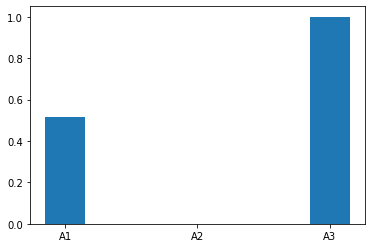

In [26]:
# Perengkingan
plt.bar(alternatif, preverensi, width = 0.3, )
plt.show()

In [3]:
# OKE DONE